In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/train_data.txt', header = None)
train_df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
333,333,0.202045,0.171458,0.190657,0.104649,0.250030,0.077296,0.002281,0.014617,0.323545,0.228517,0.035936,2
334,334,0.251739,0.314846,0.235575,0.136234,0.250882,0.069444,0.018172,0.042420,0.198612,0.199874,0.024912,2
335,335,0.477022,0.381806,0.469974,0.329060,0.600925,0.264462,0.353327,0.493738,0.298986,0.226411,0.254125,1
336,336,0.284396,0.152858,0.278419,0.157419,0.390680,0.246212,0.087582,0.104274,0.258943,0.472199,0.023969,2
337,337,0.557954,0.396348,0.546680,0.402675,0.348583,0.370591,0.248360,0.302684,0.419648,0.228939,0.191065,1


In [ ]:
train_df.columns = ['ID', 'f1', 'f2', 'f3', 'f4','f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'class']
train_df.tail()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,class
333,333,0.202045,0.171458,0.190657,0.104649,0.250030,0.077296,0.002281,0.014617,0.323545,0.228517,0.035936,2
334,334,0.251739,0.314846,0.235575,0.136234,0.250882,0.069444,0.018172,0.042420,0.198612,0.199874,0.024912,2
335,335,0.477022,0.381806,0.469974,0.329060,0.600925,0.264462,0.353327,0.493738,0.298986,0.226411,0.254125,1
336,336,0.284396,0.152858,0.278419,0.157419,0.390680,0.246212,0.087582,0.104274,0.258943,0.472199,0.023969,2
337,337,0.557954,0.396348,0.546680,0.402675,0.348583,0.370591,0.248360,0.302684,0.419648,0.228939,0.191065,1


In [ ]:
train_df.shape

(338, 13)

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/test_data.txt', header=None)
test_df.columns = ['ID', 'f1', 'f2', 'f3', 'f4','f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'class']
test_df.head()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,class
0,0,0.119570,0.334175,0.118650,0.060242,0.433962,0.186667,0.069078,0.092786,0.561570,0.282460,0.061753,2
1,1,0.801815,0.674407,0.771190,0.676478,0.489934,0.406387,0.634938,0.737062,0.498647,0.099978,0.368507,1
2,2,0.341072,0.284200,0.332638,0.202008,0.405164,0.348902,0.220275,0.220753,0.576455,0.300376,0.097557,2
3,3,0.097065,0.299344,0.098719,0.047241,0.290512,0.262595,0.231692,0.119812,0.660352,0.458084,0.029932,2
4,4,0.170764,0.204442,0.169593,0.087317,0.457434,0.257365,0.148473,0.174647,0.484438,0.409865,0.019955,2


In [ ]:
test_df.shape

(231, 13)

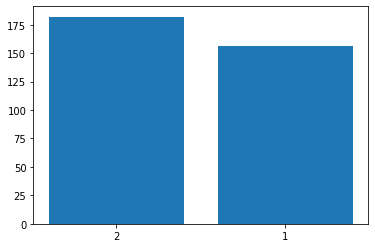

In [ ]:
plt.bar(['2', '1'], train_df['class'].value_counts())
plt.show()

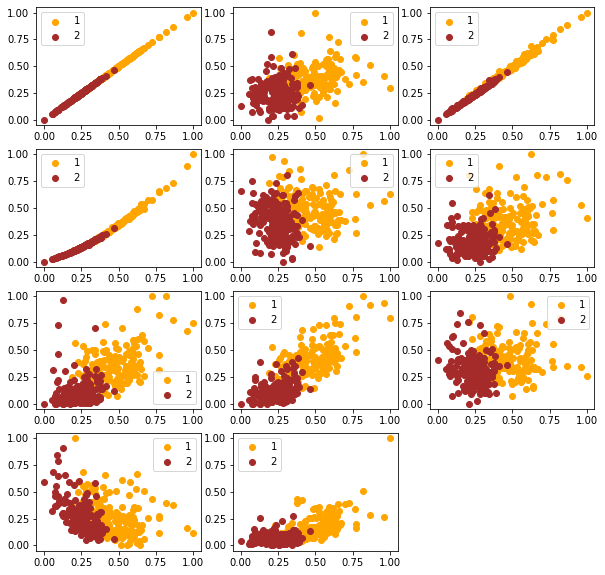

In [ ]:
train_df_C = train_df.columns

def relations(df, feature):
  df_columns = df.columns              
  feature_index = df.columns.get_loc(feature)

  plt.figure(figsize=(10, 10))

  for i in range(1, len(df_columns) - 1):
    plt.subplot(4, 3, i)
    plt.scatter(df[df['class'] == 1][feature], df[df['class'] == 1][df_columns[i]], c='orange', label='1')
    plt.scatter(df[df['class'] == 2][feature], df[df['class'] == 2][df_columns[i]], c='brown', label='2')
    plt.legend()

relations(train_df, 'f1')


So, we noticed form the graph above that f1, f3 and f4 are strongly correlated to each other, also they are loosy correlated to f7, f8. Then we decide to represent all the correlated features informations with just considering f1. we then defined a new feature that sums f1, f3, and f5 and draw this new feature aganist the class labels. From the graph it becomes fearly obvious that we can use 1.11 as threshold point.


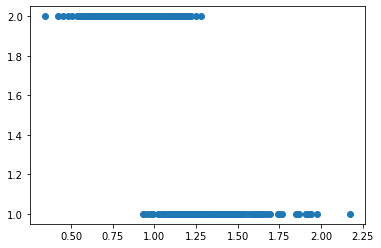

In [ ]:
plt.scatter(train_df['f1'] + train_df['f2'] + train_df['f5'], train_df['class'])


In [ ]:
# Ignore this cell, we will try to complete it in our spare time 

#####IGNORE FOR NOW###

class model:
  def __init__(self, df): # y = slope x - parameter 
    self.df = df

    self.slope = None
    self.parameter = None
    
    self.p1 = None
    self.p2 = None
    self.mp = (0.1, 0.1)

  def configuration(self):
    self.p1 = (self.df['f1'][len(self.df) // 4], self.df['f3'][len(self.df)  // 4])
    print('self.p1: ', self.p1)
    self.p2 = (self.df['f1'][len(self.df) * 3 // 4], self.df['f3'][len(self.df) * 3 // 4])
    print('self.p2', self.p2)

    self.calculate_slope()
    self.calculate_parameter()
    #self.calculate_slope_inverse()

  def calculate_slope(self):
    self.slope = (self.p2[1] - self.p1[1]) / (self.p2[0] - self.p1[0])
    print('the slope is:', self.slope)

  def calculate_slope_inverse(self):
    self.slope = - 1 / self.slope
    print('the slope is:', self.slope)

  def calculate_parameter(self):
      self.parameter = self.slope * self.mp[0] - self.mp[1]
    

  def get_output(self, x):
    return self.slope * x - self.parameter


Report: The method consisted in comparing the value of a feature compared to another feature through a threshold to be able to make our prediction. 

Accuracy = 82%,
Number of correct samples = 187,
Total number = 231
